In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cityseer.metrics import networks
from cityseer.tools import graphs, io

# update the file path as needed
cpt_net = gpd.read_file("data/capetown_network.gpkg")

In [12]:
cpt_net.head(1)

,names,routes,highways,start_nd_key,end_nd_key,edge_idx,geometry
0,silwerstroomstrand oord,,service,1028106861,4442602618,0,"LINESTRING (255237.473 6280107.594, 255198.749..."


In [13]:
cpt_net.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 151748 entries, 0 to 151747
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   names         151748 non-null  object  
 1   routes        151748 non-null  object  
 2   highways      151748 non-null  object  
 3   start_nd_key  151748 non-null  object  
 4   end_nd_key    151748 non-null  object  
 5   edge_idx      151748 non-null  int64   
 6   geometry      151748 non-null  geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 8.1+ MB


In [15]:
# Ensure all tags are stored as lists
def ensure_list_format(value):
    if isinstance(value, str):  # Convert string to list
        return [value]
    elif isinstance(value, list):  # Already correct format
        return value
    elif pd.isna(value) or value is None:  # Handle missing values
        return []
    else:
        raise ValueError(f"Unexpected data type for tag: {type(value)}")

# Apply fix to relevant columns (assuming "names" and "routes" are affected)
if "names" in cpt_net.columns:
    cpt_net["names"] = cpt_net["names"].apply(ensure_list_format)

if "routes" in cpt_net.columns:
    cpt_net["routes"] = cpt_net["routes"].apply(ensure_list_format)

# Now convert to networkX
cpt_net_nx = io.nx_from_generic_geopandas(cpt_net)

100%|████████████████████████████████| 151748/151748 [00:06<00:00, 22407.98it/s]
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
100%|███████████████████████████████| 151748/151748 [00:00<00:00, 274746.52it/s]


In [16]:
# convert the network to its dual representation
cpt_net_dual_nx = graphs.nx_to_dual(cpt_net_nx)

# print number of nodes and edges
cpt_net_dual_nx.number_of_nodes(), cpt_net_dual_nx.number_of_edges()

INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
100%|███████████████████████████████| 151720/151720 [00:01<00:00, 103450.31it/s]
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)
100%|█████████████████████████████████| 151720/151720 [00:57<00:00, 2625.45it/s]


(151720, 299753)

In [17]:
# create a network structure
nodes_gdf, edges_gdf, network_structure = io.network_structure_from_nx(
    cpt_net_dual_nx, crs=cpt_net.crs
)

nodes_gdf.head()

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.
100%|█████████████████████████████████| 151720/151720 [00:15<00:00, 9487.20it/s]


,ns_node_idx,x,y,live,weight,primal_edge,primal_edge_node_a,primal_edge_node_b,primal_edge_idx,dual_node
x255198.7-y6280075.2_x255237.5-y6280107.6_k0,0,255218.10000,6.280091e+06,True,1,"LINESTRING (255237.5 6280107.6, 255198.7 62800...",x255237.5-y6280107.6,x255198.7-y6280075.2,0,POINT (255218.1 6280091.4)
x255237.5-y6280107.6_x255252.4-y6280176.3_k0,1,255244.95000,6.280142e+06,True,1,"LINESTRING (255237.5 6280107.6, 255252.4 62801...",x255237.5-y6280107.6,x255252.4-y6280176.3,0,POINT (255244.95 6280141.95)
x255192.9-y6280105.6_x255198.7-y6280075.2_k0,2,255208.89924,6.280094e+06,True,1,"LINESTRING (255198.7 6280075.2, 255209.9 62800...",x255198.7-y6280075.2,x255192.9-y6280105.6,0,POINT (255208.89924 6280094.232511)
x255176.8-y6280075.6_x255198.7-y6280075.2_k0,3,255187.75000,6.280075e+06,True,1,"LINESTRING (255176.8 6280075.6, 255198.7 62800...",x255198.7-y6280075.2,x255176.8-y6280075.6,0,POINT (255187.75 6280075.4)
x255220.6-y6280116.4_x255252.4-y6280176.3_k0,4,255236.50000,6.280146e+06,True,1,"LINESTRING (255252.4 6280176.3, 255220.6 62801...",x255252.4-y6280176.3,x255220.6-y6280116.4,0,POINT (255236.5 6280146.35)


In [20]:
nodes_gdf.total_bounds  # Returns [min_x, min_y, max_x, max_y]

array([ 2039283.62520122, -4068349.72582108,  2120187.41138578,
       -3947943.13233049])

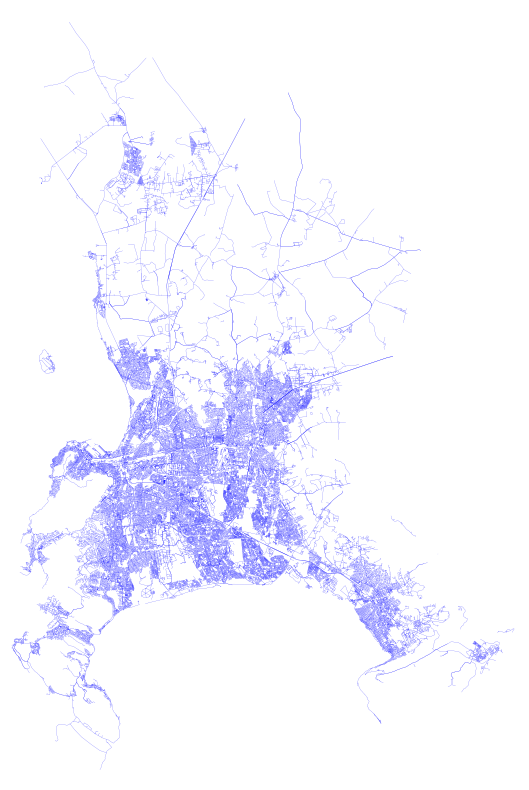

In [22]:
# Ensure CRS is correct (Cape Town should be in EPSG:3857)
if nodes_gdf.crs is None or nodes_gdf.crs.to_epsg() != 3857:
    nodes_gdf = nodes_gdf.to_crs(epsg=3857)

# Plot the network
ax = nodes_gdf.plot(linewidth=0.1, color="blue", figsize=(10, 10))

# Set bounding box to match Cape Town's extent
ax.set_xlim(2039000, 2121000)  # Expand slightly beyond the bounds
ax.set_ylim(-4070000, -3946000)
ax.axis(False)

# Show the plot
plt.show()

In [33]:
# compute shortest path node centralities
nodes_gdf = networks.node_centrality_shortest(
    # the network structure on which to compute the measures
    network_structure=network_structure,
    # the nodes GeoDataFrame to which the results will be written
    nodes_gdf=nodes_gdf,
    # the distance thresholds for computing centralities - set this as wanted
    distances=[400, 800, 40000],
)

# the results are now in the nodes GeoDataFrame
nodes_gdf.head()

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
100%|█████████████████████████████████| 151720/151720 [4:41:08<00:00,  8.99it/s]


,ns_node_idx,x,y,live,weight,primal_edge,primal_edge_node_a,primal_edge_node_b,primal_edge_idx,dual_node,...,cc_betweenness_400_ang,cc_betweenness_800_ang,cc_beta_40000,cc_cycles_40000,cc_density_40000,cc_farness_40000,cc_harmonic_40000,cc_hillier_40000,cc_betweenness_40000,cc_betweenness_beta_40000
x255198.7-y6280075.2_x255237.5-y6280107.6_k0,0,255218.10000,6.280091e+06,True,1,"LINESTRING (2044104.972 -3973973.534, 2044057....",x255237.5-y6280107.6,x255198.7-y6280075.2,0,POINT (255218.1 6280091.4),...,26.0,32.0,150.880539,476.0,498.0,6730548.0,0.263984,0.036848,981.0,285.737427
x255237.5-y6280107.6_x255252.4-y6280176.3_k0,1,255244.95000,6.280142e+06,True,1,"LINESTRING (2044104.972 -3973973.534, 2044124....",x255237.5-y6280107.6,x255252.4-y6280176.3,0,POINT (255244.95 6280141.95),...,32.0,45.0,151.722046,476.0,498.0,6701190.0,0.289482,0.037009,1466.0,423.747772
x255192.9-y6280105.6_x255198.7-y6280075.2_k0,2,255208.89924,6.280094e+06,True,1,"LINESTRING (2044057.483 -3974011.354, 2044071....",x255198.7-y6280075.2,x255192.9-y6280105.6,0,POINT (255208.89924 6280094.232511),...,0.0,0.0,150.215408,476.0,498.0,6753475.5,0.249776,0.036722,0.0,0.000000
x255176.8-y6280075.6_x255198.7-y6280075.2_k0,3,255187.75000,6.280075e+06,True,1,"LINESTRING (2044031.25 -3974010.2, 2044057.483...",x255198.7-y6280075.2,x255176.8-y6280075.6,0,POINT (255187.75 6280075.4),...,29.0,33.0,150.389832,476.0,498.0,6748029.0,0.297266,0.036752,19.0,18.723509
x255220.6-y6280116.4_x255252.4-y6280176.3_k0,4,255236.50000,6.280146e+06,True,1,"LINESTRING (2044124.927 -3973891.273, 2044084....",x255252.4-y6280176.3,x255220.6-y6280116.4,0,POINT (255236.5 6280146.35),...,0.0,0.0,151.705551,476.0,498.0,6700925.0,0.269618,0.037010,0.0,0.000000


In [34]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_400', 'cc_beta_800', 'cc_cycles_400',
       'cc_cycles_800', 'cc_density_400', 'cc_density_800', 'cc_farness_400',
       'cc_farness_800', 'cc_harmonic_400', 'cc_harmonic_800',
       'cc_hillier_400', 'cc_hillier_800', 'cc_betweenness_400',
       'cc_betweenness_800', 'cc_betweenness_beta_400',
       'cc_betweenness_beta_800', 'cc_density_400_ang', 'cc_density_800_ang',
       'cc_harmonic_400_ang', 'cc_harmonic_800_ang', 'cc_hillier_400_ang',
       'cc_hillier_800_ang', 'cc_farness_400_ang', 'cc_farness_800_ang',
       'cc_betweenness_400_ang', 'cc_betweenness_800_ang', 'cc_beta_40000',
       'cc_cycles_40000', 'cc_density_40000', 'cc_farness_40000',
       'cc_harmonic_40000', 'cc_hillier_40000', 'cc_betweenness_40000',
       'cc_betweenness_beta_40000'],
      dtype='object')

(2039000.0, 2121000.0, -4070000.0, -3946000.0)

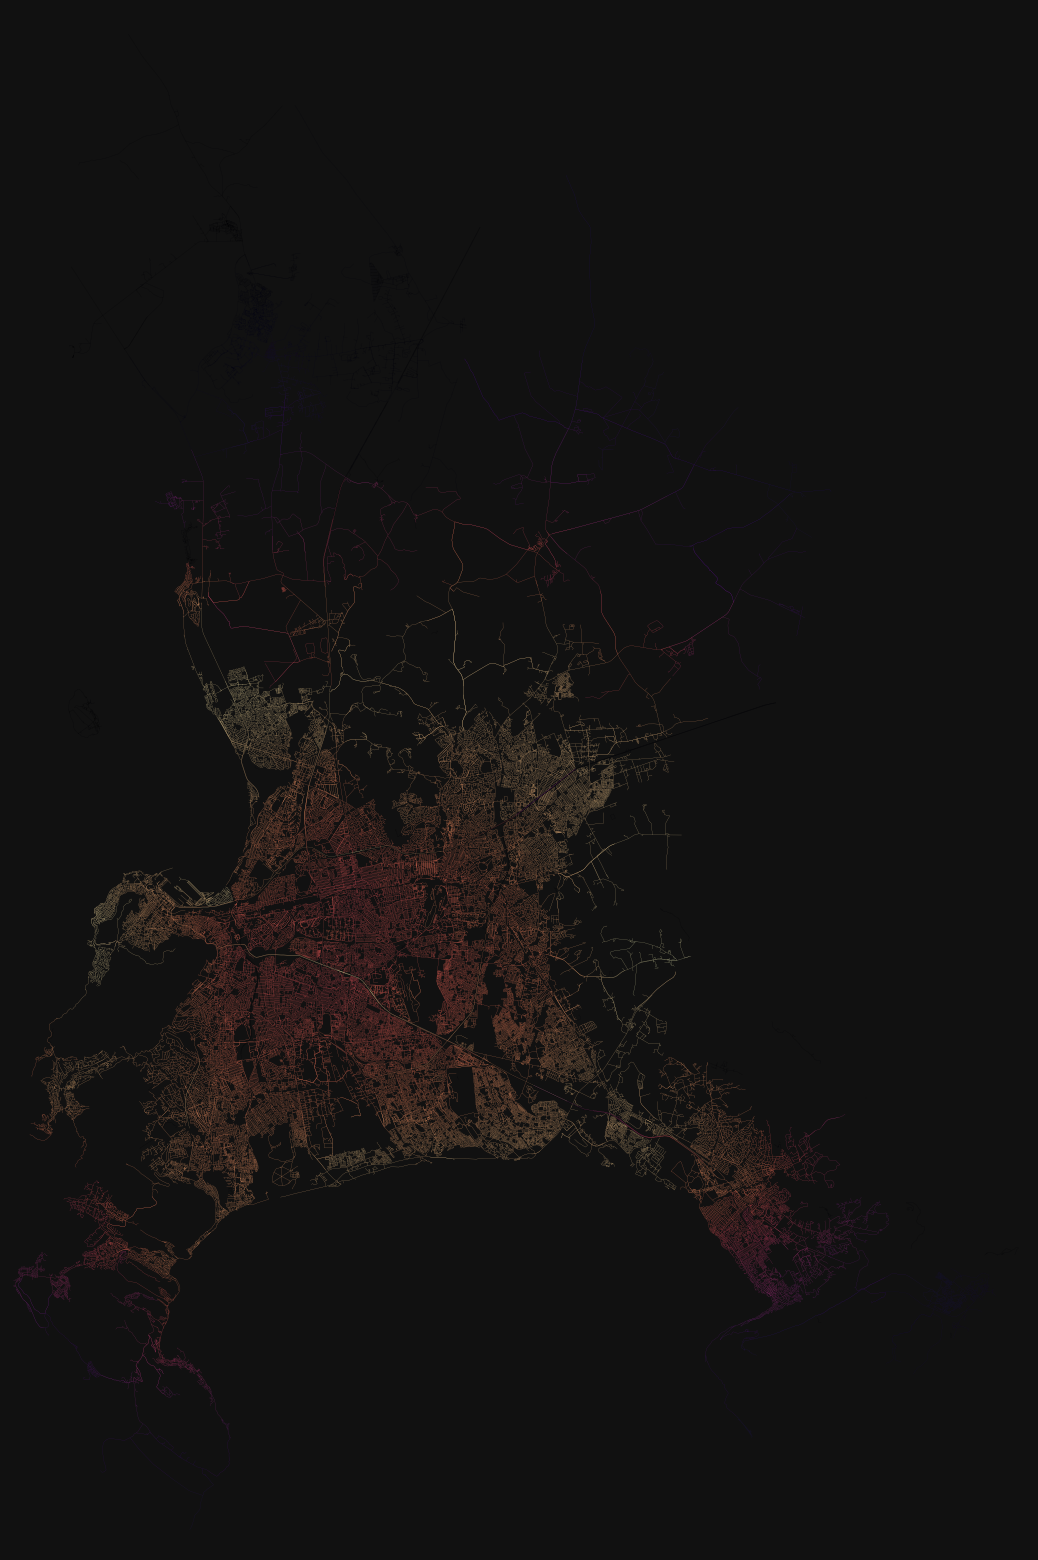

In [44]:
# this sets up the figure and axis as wanted
fig, ax = plt.subplots(figsize=(20, 20))
fig.set_facecolor("#111")

# this plots the values for the selected column
nodes_gdf.plot(
    column="cc_farness_40000",
    cmap="magma",
    linewidth=0.1,
    figsize=(8, 8),
    ax=ax,
)

ax.set_xlim(2039000, 2121000)  # Expand slightly beyond the bounds
ax.set_ylim(-4070000, -3946000)
ax.axis(False)

In [40]:
nodes_gdf.to_file("nodes.gpkg", driver="GPKG")

INFO:pyogrio._io:Created 151,720 records
